In [1]:
from __future__ import print_function, division
import os, bz2, json, time
from datetime import timedelta

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import my_util

In [14]:
# import importlib
# importlib.reload(my_util)

<module 'my_util' from 'C:\\Users\\u6314203\\pyProjects\\hip-popularity\\data_analysis\\my_util.py'>

In [2]:
categories = ["activism","autos","comedy","education","entertainment", \
              "film","gaming","howto","movies","music",\
              "news","people","pets","science","shows",\
              "sports","trailers","travel"]

eval_days = [90, 135, 180, 225, 270]

In [3]:
dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos" 
# dataset_base = "G:/MLCV dataset/engagement'16/quality_videos"
dataset_jsons = {}

In [7]:
# vid -> record
dataset = {}
# category -> vids
info_category = {}
# attributes
vids_set = set()
vids = []
days = []
views = []
shares = []
watches = []

In [8]:
for test_category in categories:
    dataset_json = None
    with open(os.path.join(dataset_base, test_category+".json"), "r") as f:
        dataset_json = f.readlines()
    
    info_category[test_category] = []
    for line in dataset_json:
        record = json.loads(line)
        try:
            category_id = int(record['snippet']['categoryId'])
            day = [int(x) for x in record['insights']['days'].split(",")]
            """!!!"""
            if len(day) < eval_days[-1]: continue
            """!!!"""
            view = [int(x) for x in record['insights']['dailyView'].split(",")]
            share = [int(x) for x in record['insights']['dailyShare'].split(",")]
            watch = [float(x) for x in record['insights']['dailyWatch'].split(",")]
        except:
            continue
        dataset[record['id']] = (category_id, day, view, share, watch)

        if record['id'] in vids_set:
            continue
        vids_set.add(record['id'])

        vids.append(record['id'])
        days.append(day)
        views.append(view)
        shares.append(share)
        watches.append(watch)
        
        info_category[test_category].append(record['id'])
print("dataset size:", len(vids))

dataset size: 1069340


#### Stat

In [10]:
for key, val in info_category.items():
    print(key, len(val))

activism 7476
autos 25139
comedy 31519
education 40311
entertainment 177236
film 42439
gaming 219709
howto 59965
movies 72
music 116884
news 37508
people 220100
pets 6343
science 31899
shows 676
sports 39129
trailers 14
travel 12921


In [11]:
print("Min days",np.min([len(x) for x in days]))
print("Max days",np.max([len(x) for x in days]))
print("Average days",np.average([len(x) for x in days]))

Min days 270
Max days 328
Average days 290.1426908186358


#### Analysis

In [12]:
df_total_views_log = my_util.total_log_at(eval_days, views, vids, accumulate=False)

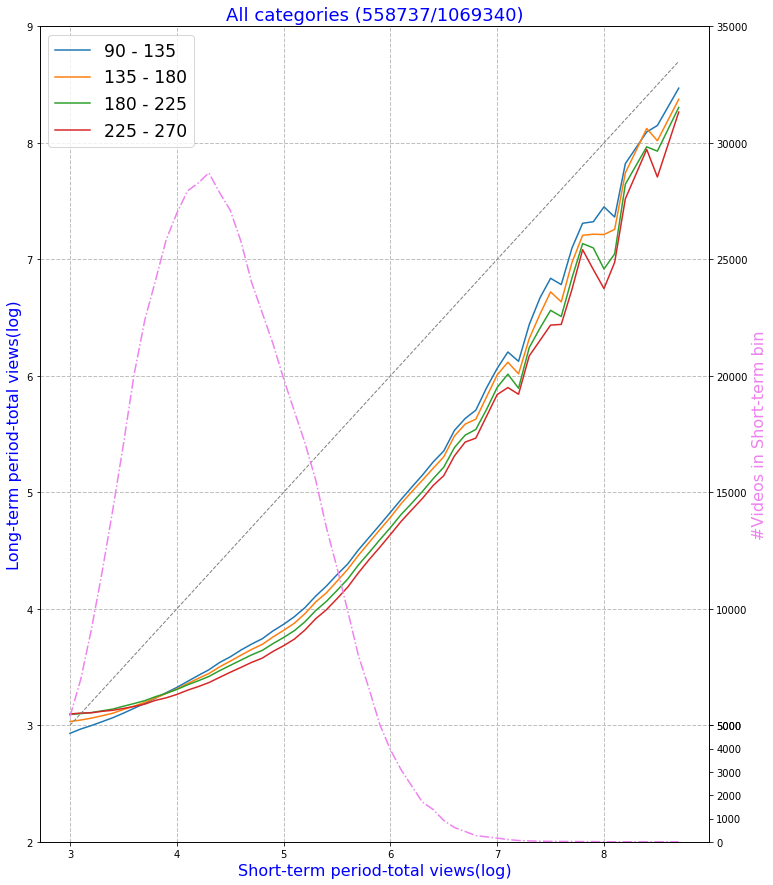

In [17]:
fig = plt.figure(figsize=(12, 15))
title = "All categories ({}/{})".format(len(df_total_views_log.index), len(vids))
my_util.plot_fixed_window(eval_days, df_total_views_log, test_category, fig,\
                          title, average_daily=False)
plt.savefig('figs/total/all.png', bbox_inches='tight')

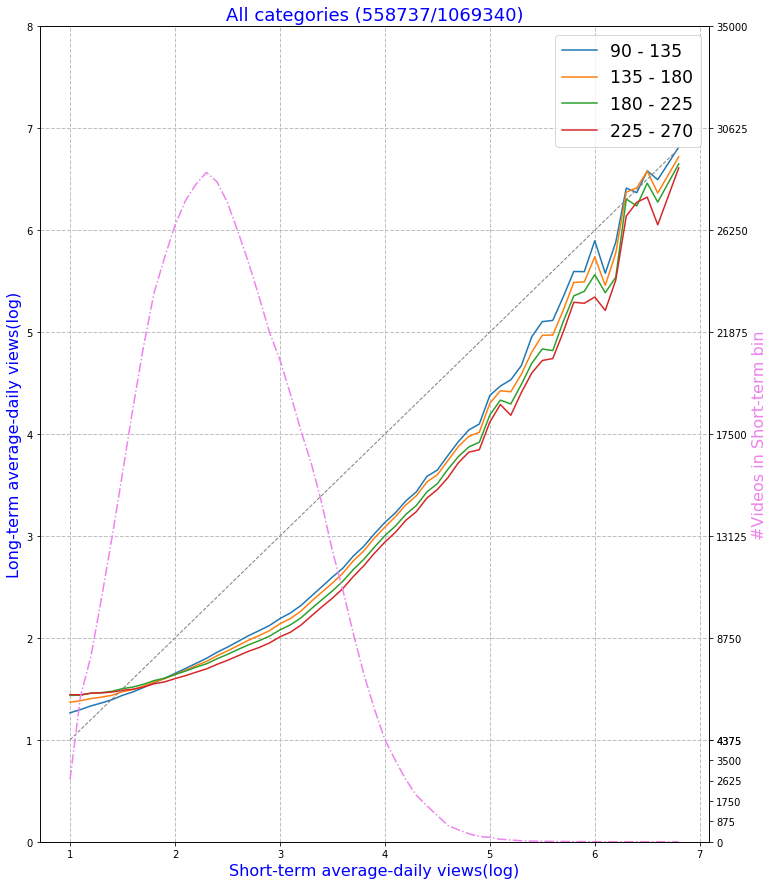

In [18]:
fig = plt.figure(figsize=(12, 15))
title = "All categories ({}/{})".format(len(df_total_views_log.index), len(vids))
my_util.plot_fixed_window(eval_days, df_total_views_log, test_category, fig,\
                          title, average_daily=True)
plt.savefig('figs/avg/all.png', bbox_inches='tight')

In [32]:
info_category["all_vids"] = vids

In [33]:
with open("./category_vids.json", "w") as f:
    json.dump(info_category, f)